In [12]:
# Ques 2:

from lea import Lea
from lea import Pf

alternator_broken = Lea.boolProb(1,1000);
fan_belt_broken = Lea.boolProb(2,100);

battery_not_charging = Lea.buildCPT(
    (alternator_broken & fan_belt_broken,Lea.boolProb(1000,1000)),
    (~alternator_broken & fan_belt_broken,Lea.boolProb(1000,1000)),
    (alternator_broken & ~fan_belt_broken,Lea.boolProb(1000,1000)),
    (~alternator_broken & ~fan_belt_broken,Lea.boolProb(5,1000))
                                    )
battery_flat = Lea.buildCPT((battery_not_charging,Lea.boolProb(90,100)),(~battery_not_charging,Lea.boolProb(10,100)));
 
car_doesnot_start = Lea.buildCPT((battery_flat,Lea.boolProb(100,100)),(~battery_flat, Lea.boolProb(5,100)));

print('probability that the alternator is broken given that the car won’t start');
print(Pf((alternator_broken).given(car_doesnot_start)));


print('probability that the fan belt is broken given that the car won’t start');
print(Pf((fan_belt_broken).given(car_doesnot_start)));

print('probability that the fan belt is broken given that the car won’t start and the alternator is broken');
print(Pf((fan_belt_broken).given(car_doesnot_start & alternator_broken)));

print('probability that the alternator and the fan belt is broken given that the car won’t start');
print(Pf((fan_belt_broken & alternator_broken).given(car_doesnot_start)));


probability that the alternator is broken given that the car won’t start
0.005496004507962575
probability that the fan belt is broken given that the car won’t start
0.1099200901592515
probability that the fan belt is broken given that the car won’t start and the alternator is broken
0.02
probability that the alternator and the fan belt is broken given that the car won’t start
0.0001099200901592515


In [10]:
# Ques 3
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score        
import numpy as np
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
import operator

    
def occurrences(list1):
    no_of_examples = len(list1)
    prob = dict(Counter(list1))
    for key in prob.keys():
        prob[key] = prob[key] / float(no_of_examples)
    return prob

def prior_calculation(outcome):
    classes = np.unique(outcome)
    class_probabilities = occurrences(outcome)
    return class_probabilities;

def word_count(X_train,Y_train):
    word_count = {};
    n,d = X_train.shape;
    for i in range(n):
        if(Y_train[i] not in word_count):
            word_count[Y_train[i]] = X_train[i].sum();
        else:
            word_count[Y_train[i]] += X_train[i].sum();
    return word_count;

def likelihood(X,Y):
    likelihood_prob = {};
    n = len(Y);
    for i in range(n):
        likelihood_class = Y[i];
        if (likelihood_class not in likelihood_prob):
            likelihood_prob[likelihood_class]={}
        item(likelihood_class, i, X[i].T,likelihood_prob)
    return likelihood_prob;
        
def item(classs, i, X,likelihood_prob):
    for i in range(len(X)):
        temp = X[i]
        if(i not in likelihood_prob[classs]):
            likelihood_prob[classs][i] = temp
        else:
            likelihood_prob[classs][i] += temp
    return likelihood_prob;

def test_prediction(X,prob_likelihood,class_probabilities,word_count):
    n,d = X.shape
    y_pred = np.empty(n)
    for i in range(n):
        new_x = X[i].T
        arr = {}
        for k, v in class_probabilities.items():
            arr[k] = v
            for j in range(len(new_x)):
                if(new_x[j] == 0):
                    continue
                arr[k] *= (prob_likelihood[k][j] +
                        1)/(word_count[k] + d)
        y_pred[i] = max(arr.items(), key=operator.itemgetter(1))[0]
    return y_pred

categories = ['comp.windows.x', 'comp.os.ms-windows.misc', 
              'rec.autos']
remove = ('headers', 'footers', 'quotes')

train = fetch_20newsgroups(subset='train',categories=categories,shuffle=True, random_state=30,remove=remove)

test = fetch_20newsgroups(subset='test',shuffle=True, random_state=30,categories=categories,remove=remove)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train.data).toarray()
X_test = vectorizer.transform(test.data).toarray()
Y_train  = train.target 
Y_test = test.target
# we will train the X as per binomial naive bayes distribution
# first step : calculate the priors, that is , the probability of the classes in the outcome
class_probabilities = prior_calculation(Y_train);


In [11]:


# second step
# count word in each class
class_word_count = word_count(X_train,Y_train);

# third step
# find likelihood
prob_likelihood = likelihood(X_train,Y_train);

# predict y
predict_y = test_prediction(X_test,prob_likelihood,class_probabilities,class_word_count);

In [15]:
print(accuracy_score(Y_test, predict_y))
print(confusion_matrix(Y_test, predict_y))

0.5907172995780591
[[  1 335  58]
 [  0 376  19]
 [  1  72 323]]


In [74]:
# Question 1
import math
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# this is the probability density function
def get_density(x,mu,sigma):
    #print('sigma is ');
    #print(sigma);
    x_mu = np.matrix(x - mu)
    #print('inverse sigma is before')
    inv_sigma = np.linalg.inv(sigma)
    #print('inverse sigma is after')
    #print(inv_sigma);
    det_sqrt = np.linalg.det(sigma)**0.5
    norm_const = 1.0/((2*np.pi)**(len(x)/2)*det_sqrt)
    exp_value = math.pow(math.e,-0.5 * (x_mu * inv_sigma * x_mu.T))
    score = norm_const * exp_value
    return score;

In [76]:
# define expectation step : getting the probability of every data in a class
def getPosterior(x,priors,means,stdevs,classCount,posteriors): 
    # go through every data
    n,d = x.shape;
    for i in range(n):
        sum_posteriors = 0
        # go through all the cluster class
        for k in range(classCount): 
            # calculate the posterior
            posteriors[i,k] = get_density(x[i,:],means[k],stdevs[k])*priors[k]
            sum_posteriors += posteriors[i,k] # sum of all posteriors
        for k in range(classCount): 
            posteriors[i,k] /= sum_posteriors;
    return posteriors;

In [78]:
# define maximasation step : updating the parameters
def relearn(x,priors,means,stdevs,classCount,posteriors):
    n,d = x.shape;
    # sum of posteriors
    sum_posteriors = np.mat(np.sum(posteriors,axis=0))
    # iterate for every class
    for i in range(classCount):
        # create a new matrix with zero values for means and stdevs
        means[i] = np.mat(np.zeros((1, d)))
        stdevs[i] = np.mat(np.zeros((d, d)))
        # iterate for to calculate the mean
        for j in range(n):
            means[i] += posteriors[j, i] * x[j, :];
        means[i] /= sum_posteriors[0, i]
        # iterate for every data to calculate the stdevs
        for j in range(n):
            stdevs[i] += posteriors[j, i] * (x[j, :] - means[i]).T * (x[j, :] - means[i])
        stdevs[i] /= sum_posteriors[0, i];
        priors[i] = sum_posteriors[0, i] / n;
    return means,stdevs,priors;

c:\users\shipra malik\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


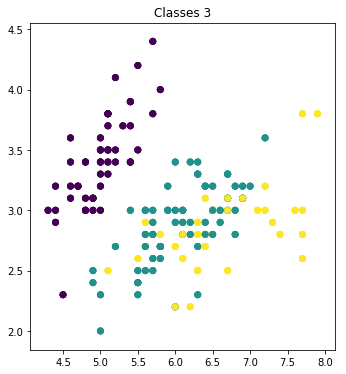

In [119]:
import pandas as pd
# take data
plotCount = 0
x = np.loadtxt('iris.data',delimiter=',')
x = np.mat(np.delete(x, np.s_[4::1], 1))
n, d = x.shape;
iterations = 1;
k = 3
threshold = 0.001
# initialise the priors
priors = np.ones(k)/k;
#print(priors)
# initialise the means, randomly take three samples from the dataset and assign them as means
means = [x[i, :] for i in np.random.randint(0, n, size=k)]
#print(means)
#initialise the standard deviation
#stdevs= [np.eye(d)] * k
stdevs = [np.mat(np.identity(d)) for _ in range(k)]
#print(np.array(stdevs))
#initialisation done

prob_matrix = np.zeros((n, k));
df = pd.DataFrame(columns=['sl', 'sw', 'pl','pw','class', 'Probability'])
for i in range(iterations):
    dif = 1;
    threshold = 0.001;
    # perform upto convergence ; below is the convergent condition
    while(dif > threshold):
        means_previous = np.copy(means);
        # Perform the E step
        #print('Calculating prob matrix')
        prob_matrix = getPosterior(x,priors,means,stdevs,k,prob_matrix);
        #print(prob_matrix)
        # Perform the M step
        #print(means_previous)
        means,stdevs,priors = relearn(x,priors,means,stdevs,k,prob_matrix);
        #means,stdevs,priors = m_step(prob_matrix, k, x);
        #print(means)
        dif = 0;
        for i in range(k):
            distance = (means[i]-means_previous[i])*(means[i]-means_previous[i]).T
            #print(dif)
            #print(distance.shape)
            dif += distance[0]

            
            
fig = plt.figure(figsize=(14, 10))
classification = np.mat(np.zeros((n, 2)))
for i in range(n):
        classification[i, :] = np.argmax(prob_matrix[i, :]), np.amax(prob_matrix[i, :])
        arr = [item for item in np.squeeze(
                np.asarray(x[i, :]))] + [np.argmax(prob_matrix[i, :]), np.amax(prob_matrix[i, :])]
        df.loc[i] = arr

for j in range(k):
    pointsInCluster = x[np.nonzero(classification[:, 0].A == j)[0]]
    df['class'] = pd.to_numeric(df['class'],
                downcast='signed', errors='coerce')
    subplot = fig.add_subplot(235 + plotnumbercount) 
    subplot.scatter(df['sl'], df['sw'], c=df['class'])
    subplot.set_title('Classes 3')
    plotCount+=1

plt.tight_layout()
plt.show()
# plot the results of classification

